<h2>STINTSY Machine Project</h2>

Group Doc OCT (Patrick Ong, Russel Campol, Miko Tansingco)

<h4>Library Importing</h4>

In [1]:
import matplotlib.image as mpimg
import cv2
import os
import numpy as np
import pandas as pd
import collections
from tqdm import tqdm
from matplotlib import pyplot as plt
from random import *
#imports for image reading
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
#imports for label encoding for classes
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

<h3>Encode labels

<h4>Exploratory Data Analysis</h4>

1. Analysis of images

In [2]:
data = pd.read_csv('labels.csv')

In [3]:
data

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [4]:
data_plot = data.groupby('breed')['id'].count().sort_values()
data_plot.tail(50)

breed
weimaraner               85
bluetick                 85
african_hunting_dog      86
schipperke               86
kelpie                   86
english_foxhound         86
bouvier_des_flandres     86
collie                   87
old_english_sheepdog     87
boston_bull              87
irish_setter             88
sealyham_terrier         88
rhodesian_ridgeback      88
dandie_dinmont           89
bedlington_terrier       89
silky_terrier            90
lhasa                    90
border_terrier           91
newfoundland             91
ibizan_hound             91
pembroke                 92
italian_greyhound        92
chow                     93
pug                      94
norwegian_elkhound       95
whippet                  95
siberian_husky           95
papillon                 96
saluki                   99
lakeland_terrier         99
irish_wolfhound         101
miniature_pinscher      102
blenheim_spaniel        102
australian_terrier      102
japanese_spaniel        105
beagle        

<AxesSubplot:title={'center':'Count Per Breed'}, ylabel='breed'>

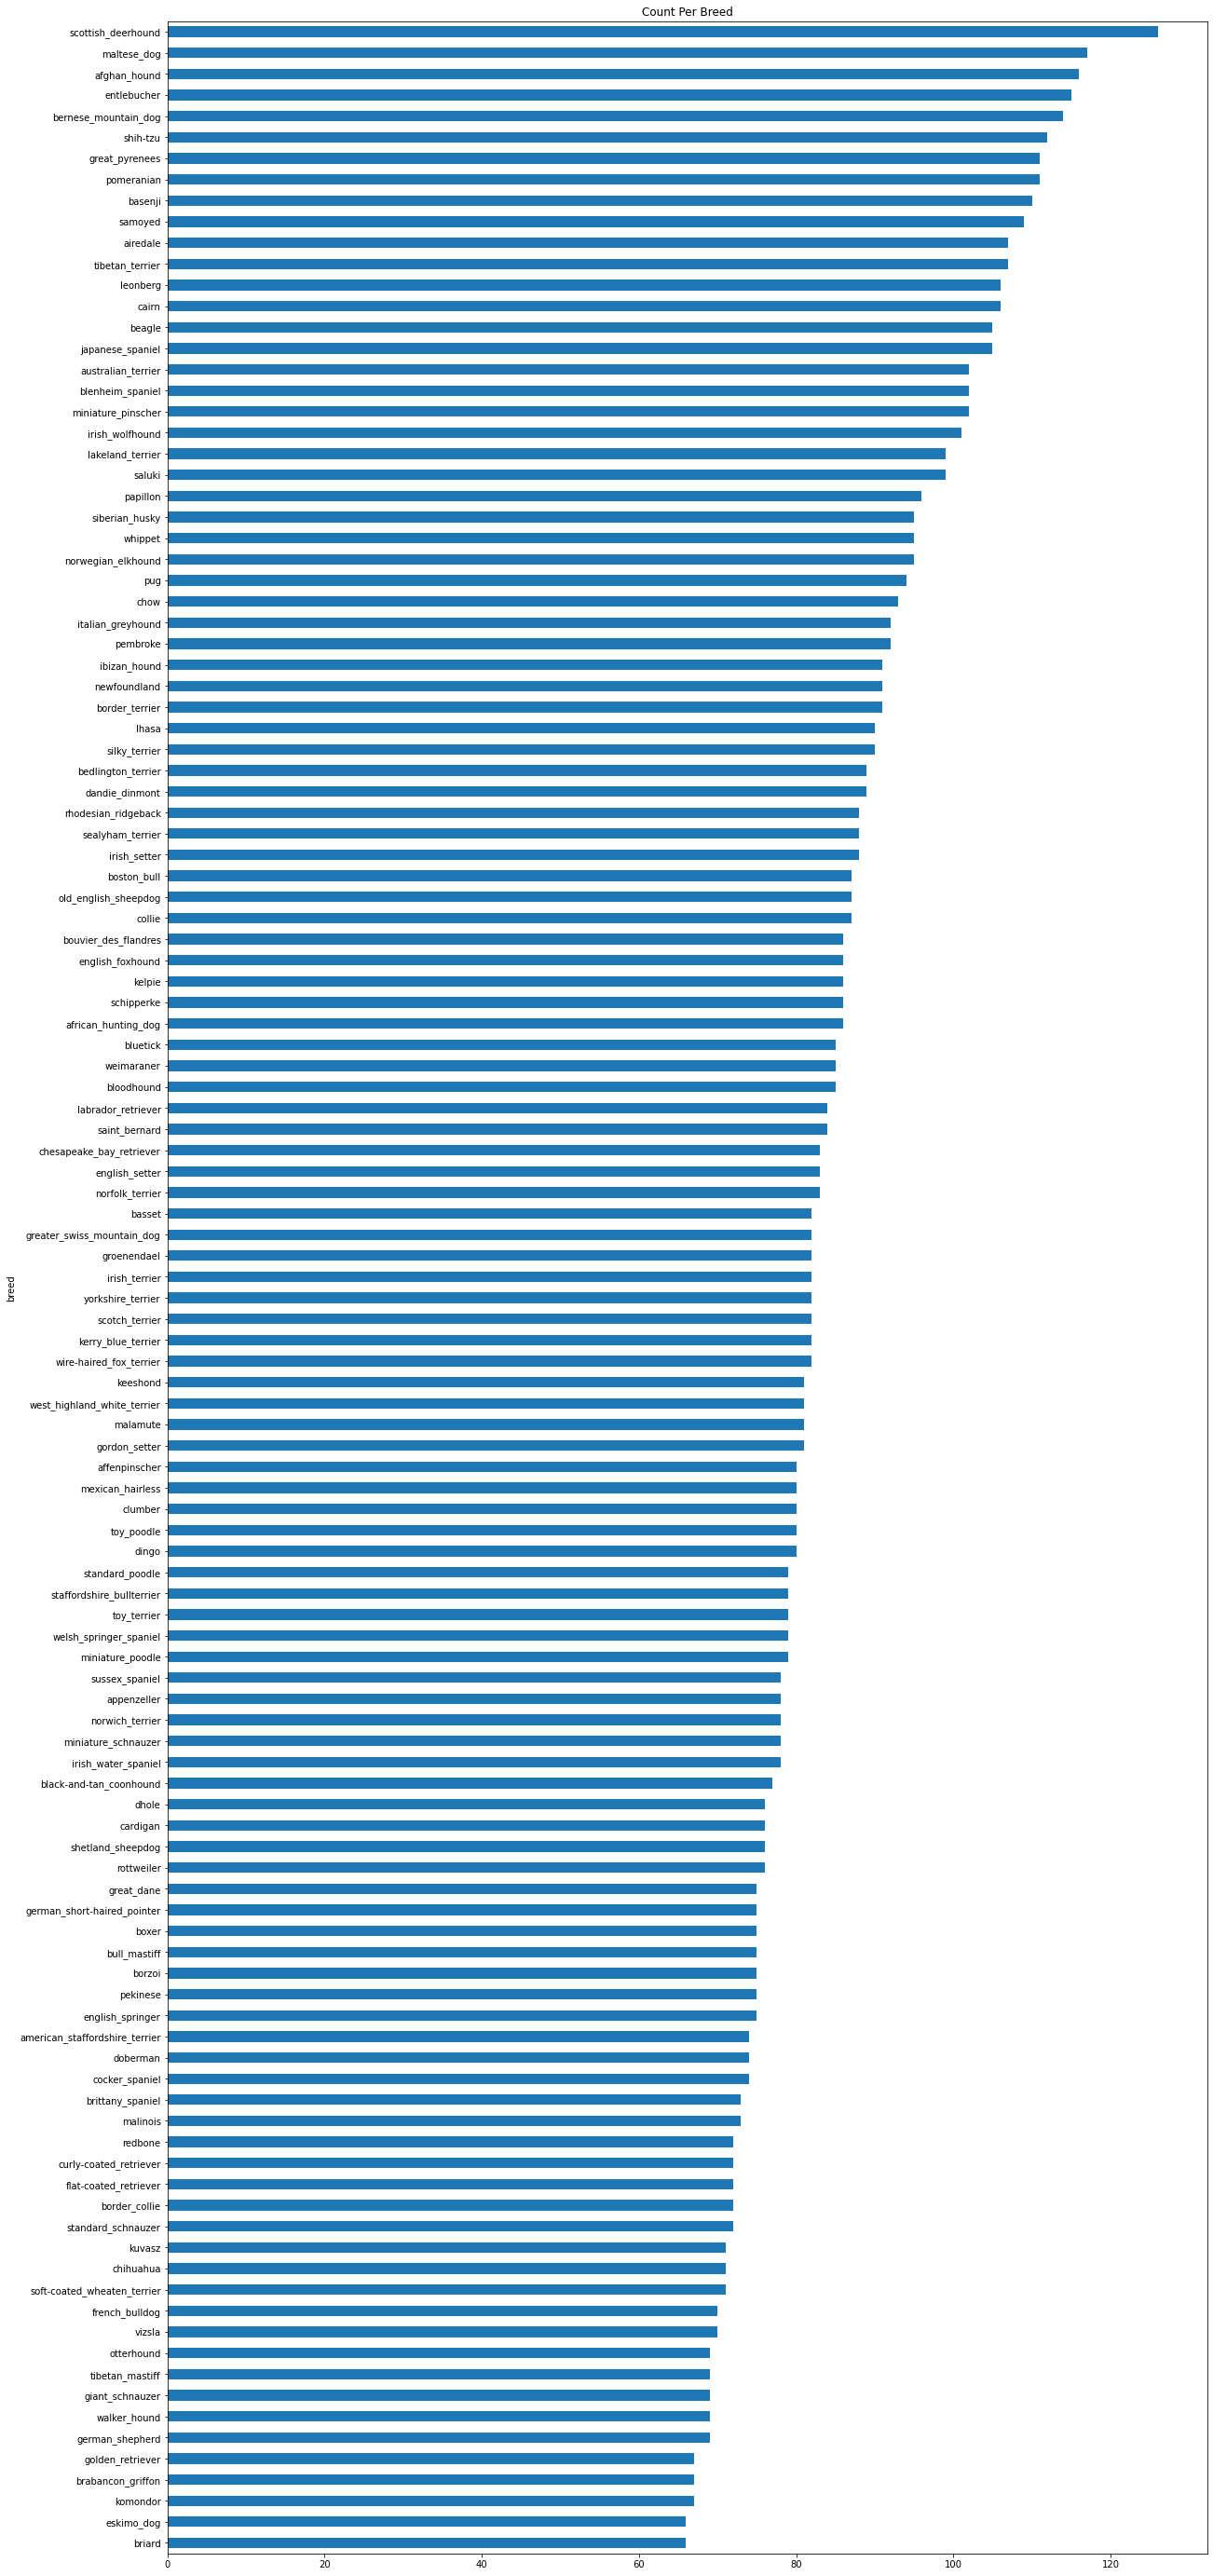

In [5]:
data_plot.plot(kind = 'barh', figsize=(20,50), title="Count Per Breed")

In [6]:
data_plot.describe()

count    120.000000
mean      85.183333
std       13.298122
min       66.000000
25%       75.000000
50%       82.000000
75%       91.250000
max      126.000000
Name: id, dtype: float64

In [7]:
terrier = data[data['breed'].str.contains('terrier')]
terrier

id                        breed
5      002211c81b498ef88e1b40b9abf84e1d           bedlington_terrier
6      00290d3e1fdd27226ba27a8ce248ce85           bedlington_terrier
14     0075dc49dab4024d12fafe67074d8a81              norfolk_terrier
16     007b5a16db9d9ff9d7ad39982703e429      wire-haired_fox_terrier
18     007ff9a78eba2aebb558afea3a51c469             lakeland_terrier
...                                 ...                          ...
10192  ff4afeb51a1473f7ba18669a8ff48bc9               border_terrier
10194  ff52a3909f5801a71161cec95d213107  west_highland_white_terrier
10201  ff84992beff3edd99b72718bec9448d2           bedlington_terrier
10202  ff8e3fa7e04faca99af85195507ee54d             sealyham_terrier
10212  ffc532991d3cd7880d27a449ed1c4770              tibetan_terrier

[1621 rows x 2 columns]

In [8]:
terrier['breed'].value_counts()

tibetan_terrier                   107
australian_terrier                102
lakeland_terrier                   99
border_terrier                     91
silky_terrier                      90
bedlington_terrier                 89
sealyham_terrier                   88
norfolk_terrier                    83
irish_terrier                      82
wire-haired_fox_terrier            82
kerry_blue_terrier                 82
yorkshire_terrier                  82
scotch_terrier                     82
west_highland_white_terrier        81
toy_terrier                        79
staffordshire_bullterrier          79
norwich_terrier                    78
american_staffordshire_terrier     74
soft-coated_wheaten_terrier        71
Name: breed, dtype: int64

In [9]:
terrier.shape

(1621, 2)

In [10]:
retriever = data[data['breed'].str.contains('retriever')]
retriever

id                     breed
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
25     00a366d4b4a9bbb6c8a63126697b7656          golden_retriever
31     00cc68a50b2d016a6b29af628ea4e04b        labrador_retriever
37     0100f55e4f0fe28f2c0465d3fc4b9897          golden_retriever
127    02ff77af410e966b7b661f6f0789d947          golden_retriever
...                                 ...                       ...
10134  fdc614c16f54555064a32bc94522b4a4    curly-coated_retriever
10172  febcab8eb2da444bf83336cffec7eb92          golden_retriever
10182  ff05f3976c17fef275cc0306965b3fe4        labrador_retriever
10198  ff6f47aa8e181b6efa4d0be7b09b5628          golden_retriever
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[378 rows x 2 columns]

In [11]:
retriever['breed'].value_counts()

labrador_retriever          84
chesapeake_bay_retriever    83
flat-coated_retriever       72
curly-coated_retriever      72
golden_retriever            67
Name: breed, dtype: int64

In [12]:
retriever.shape

(378, 2)

In [13]:
dog = data[data['breed'].str.contains('dog')]
dog

id                       breed
10     004396df1acd0f1247b740ca2b14616e           shetland_sheepdog
12     00693b8bc2470375cc744a6391d397ec                 maltese_dog
15     00792e341f3c6eb33663e415d0715370         african_hunting_dog
50     014c2b0cd8e3b517e649cecf8543b8fe         african_hunting_dog
61     0177a92a906192bfde8adbb8a237e524  greater_swiss_mountain_dog
...                                 ...                         ...
10154  fe3e760d763e186541e18f303cd7caca        bernese_mountain_dog
10176  fee98c990f4d69c6a8467dd0f0668440  greater_swiss_mountain_dog
10178  fef5d4cdaf50cf159102e803c7d6aa9c        bernese_mountain_dog
10200  ff7d9c08091acc3b18b869951feeb013                 maltese_dog
10204  ffa0055ec324829882186bae29491645                 maltese_dog

[698 rows x 2 columns]

In [14]:
dog['breed'].value_counts()

maltese_dog                   117
bernese_mountain_dog          114
old_english_sheepdog           87
african_hunting_dog            86
greater_swiss_mountain_dog     82
shetland_sheepdog              76
french_bulldog                 70
eskimo_dog                     66
Name: breed, dtype: int64

In [15]:
breeds = data['breed']
breeds = breeds.str.split('_')
breeds

0                      [boston, bull]
1                             [dingo]
2                          [pekinese]
3                          [bluetick]
4                 [golden, retriever]
                     ...             
10217                        [borzoi]
10218               [dandie, dinmont]
10219                      [airedale]
10220           [miniature, pinscher]
10221    [chesapeake, bay, retriever]
Name: breed, Length: 10222, dtype: object

In [16]:
breed_instances = [i[len(i)-1] for i in breeds]
breed_instances

['bull',
 'dingo',
 'pekinese',
 'bluetick',
 'retriever',
 'terrier',
 'terrier',
 'borzoi',
 'basenji',
 'deerhound',
 'sheepdog',
 'hound',
 'dog',
 'bluetick',
 'terrier',
 'dog',
 'terrier',
 'redbone',
 'terrier',
 'boxer',
 'doberman',
 'otterhound',
 'otterhound',
 'terrier',
 'dingo',
 'retriever',
 'schnauzer',
 'spaniel',
 'coonhound',
 'cairn',
 'affenpinscher',
 'retriever',
 'hound',
 'setter',
 'hound',
 'weimaraner',
 'schnauzer',
 'retriever',
 'bull',
 'groenendael',
 'terrier',
 'spaniel',
 'dhole',
 'dingo',
 'affenpinscher',
 'poodle',
 'terrier',
 'terrier',
 'terrier',
 'elkhound',
 'dog',
 'spaniel',
 'hound',
 'spaniel',
 'terrier',
 'schnauzer',
 'affenpinscher',
 'shih-tzu',
 'terrier',
 'kuvasz',
 'shepherd',
 'dog',
 'basset',
 'terrier',
 'schipperke',
 'ridgeback',
 'setter',
 'appenzeller',
 'shepherd',
 'bloodhound',
 'samoyed',
 'schnauzer',
 'spaniel',
 'setter',
 'kelpie',
 'papillon',
 'collie',
 'spaniel',
 'appenzeller',
 'deerhound',
 'entlebuche

In [17]:
breed_instances_series = pd.Series(breed_instances)

In [18]:
breed_instances_series.value_counts().head(30)

terrier        1542
spaniel         589
dog             465
retriever       378
hound           276
setter          252
poodle          238
schnauzer       219
sheepdog        163
collie          159
mastiff         144
deerhound       126
entlebucher     115
shih-tzu        112
pyrenees        111
pomeranian      111
basenji         110
samoyed         109
airedale        107
cairn           106
leonberg        106
beagle          105
pinscher        102
wolfhound       101
saluki           99
papillon         96
elkhound         95
whippet          95
husky            95
pug              94
dtype: int64

In [19]:
breed_instances_series.value_counts().tail(30)

malamute         81
keeshond         81
clumber          80
dingo            80
affenpinscher    80
hairless         80
bullterrier      79
appenzeller      78
coonhound        77
dhole            76
cardigan         76
rottweiler       76
boxer            75
borzoi           75
springer         75
pointer          75
dane             75
pekinese         75
doberman         74
malinois         73
redbone          72
kuvasz           71
chihuahua        71
vizsla           70
bulldog          70
shepherd         69
otterhound       69
griffon          67
komondor         67
briard           66
dtype: int64

In [20]:
breeds_unique = data['breed'].unique()
breeds_unique

for i in range(len(breeds_unique)):
    j = breeds_unique[i].split('_')
    breeds_unique[i] = j[len(j)-1]
    
pd.Series(breeds_unique).value_counts().head(30)

terrier        18
spaniel         7
dog             5
retriever       5
poodle          3
setter          3
hound           3
schnauzer       3
mastiff         2
sheepdog        2
collie          2
griffon         1
chow            1
bullterrier     1
wolfhound       1
pinscher        1
bernard         1
bull            1
clumber         1
greyhound       1
foxhound        1
lhasa           1
hairless        1
leonberg        1
airedale        1
cardigan        1
dinmont         1
husky           1
pomeranian      1
springer        1
dtype: int64

In [21]:
data['breed'].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

<h2> Data Preprocessing </h2>

In [23]:
toRemove = pd.DataFrame()
for i in data['breed'].unique():
    length = len(data[data['breed'] == i])
    if length < 90:
        toRemove = toRemove.append(data[data['breed'] == i])
toRemove

C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data[

C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data[

C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data['breed'] == i])
C:\Users\User\AppData\Local\Temp\ipykernel_29460\1418028161.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toRemove = toRemove.append(data[data[

id        breed
0      000bec180eb18c7604dcecc8fe0dba07  boston_bull
38     010d65bd29d246aea53d9849da142ccf  boston_bull
304    0755a940eac9a9b8cf0328b4be062096  boston_bull
324    07d7cfbdbd3682cae50902b53c798028  boston_bull
471    0b3d3120a62c2bc280f589d473041d06  boston_bull
...                                 ...          ...
9632   f25a4184e33741e745175fd1d7c6d172   rottweiler
9823   f72df3c3daa677aa76027366ad55721f   rottweiler
9870   f8271e8e638b9bab6a0d3e164874dd53   rottweiler
9997   fab782d25875a7cf5298cd2e2aa01cd5   rottweiler
10078  fc77bf555c892344771a2c6714e72659   rottweiler

[6635 rows x 2 columns]

In [24]:
new_data = data.drop(labels=toRemove.index, axis=0)
new_data

id               breed
8      003df8b8a8b05244b1d920bb6cf451f9             basenji
9      0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
12     00693b8bc2470375cc744a6391d397ec         maltese_dog
18     007ff9a78eba2aebb558afea3a51c469    lakeland_terrier
29     00bee065dcec471f26394855c5c2f3de               cairn
...                                 ...                 ...
10212  ffc532991d3cd7880d27a449ed1c4770     tibetan_terrier
10215  ffcde16e7da0872c357fbc7e2168c05f            airedale
10216  ffcffab7e4beef9a9b8076ef2ca51909             samoyed
10219  ffe2ca6c940cddfee68fa3cc6c63213f            airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac  miniature_pinscher

[3587 rows x 2 columns]

<h3>check new dataset

In [25]:
new_data

id               breed
8      003df8b8a8b05244b1d920bb6cf451f9             basenji
9      0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
12     00693b8bc2470375cc744a6391d397ec         maltese_dog
18     007ff9a78eba2aebb558afea3a51c469    lakeland_terrier
29     00bee065dcec471f26394855c5c2f3de               cairn
...                                 ...                 ...
10212  ffc532991d3cd7880d27a449ed1c4770     tibetan_terrier
10215  ffcde16e7da0872c357fbc7e2168c05f            airedale
10216  ffcffab7e4beef9a9b8076ef2ca51909             samoyed
10219  ffe2ca6c940cddfee68fa3cc6c63213f            airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac  miniature_pinscher

[3587 rows x 2 columns]

In [28]:
data_plot = new_data.groupby('breed')['id'].count().sort_values()

In [29]:
data_plot

breed
silky_terrier            90
lhasa                    90
ibizan_hound             91
newfoundland             91
border_terrier           91
pembroke                 92
italian_greyhound        92
chow                     93
pug                      94
norwegian_elkhound       95
whippet                  95
siberian_husky           95
papillon                 96
saluki                   99
lakeland_terrier         99
irish_wolfhound         101
australian_terrier      102
blenheim_spaniel        102
miniature_pinscher      102
beagle                  105
japanese_spaniel        105
leonberg                106
cairn                   106
tibetan_terrier         107
airedale                107
samoyed                 109
basenji                 110
great_pyrenees          111
pomeranian              111
shih-tzu                112
bernese_mountain_dog    114
entlebucher             115
afghan_hound            116
maltese_dog             117
scottish_deerhound      126
Name: id, dtyp

<h3>Initialize variables

In [30]:
num_breeds = 35
im_size = 224
batch_size = 64
encoder = preprocessing.LabelEncoder()

In [31]:
new_data['img_file'] = new_data['id'].apply(lambda x: x + ".jpg")

In [32]:
new_data

id               breed  \
8      003df8b8a8b05244b1d920bb6cf451f9             basenji   
9      0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound   
12     00693b8bc2470375cc744a6391d397ec         maltese_dog   
18     007ff9a78eba2aebb558afea3a51c469    lakeland_terrier   
29     00bee065dcec471f26394855c5c2f3de               cairn   
...                                 ...                 ...   
10212  ffc532991d3cd7880d27a449ed1c4770     tibetan_terrier   
10215  ffcde16e7da0872c357fbc7e2168c05f            airedale   
10216  ffcffab7e4beef9a9b8076ef2ca51909             samoyed   
10219  ffe2ca6c940cddfee68fa3cc6c63213f            airedale   
10220  ffe5f6d8e2bff356e9482a80a6e29aac  miniature_pinscher   

                                   img_file  
8      003df8b8a8b05244b1d920bb6cf451f9.jpg  
9      0042188c895a2f14ef64a918ed9c7b64.jpg  
12     00693b8bc2470375cc744a6391d397ec.jpg  
18     007ff9a78eba2aebb558afea3a51c469.jpg  
29     00bee065dcec471f26394855c5c2f3de.jpg  
...                                     ...  
10212  ffc532991d3cd7880d27a449ed1c4770.jpg  
10215  ffcde16e7da0872c357fbc7e2168c05f.jpg  
10216  ffcffab7e4beef9a9b8076ef2ca51909.jpg  
10219  ffe2ca6c940cddfee68fa3cc6c63213f.jpg  
10220  ffe5f6d8e2bff356e9482a80a6e29aac.jpg  

[3587 rows x 3 columns]

<h3> Open images and pre processing

In [34]:
#create a numpy array of the shape
#(number of dataset records, image size , image size, 3 for rgb channel ayer)
#this will be input for model
train_x = np.zeros((len(new_data), im_size, im_size, 3), dtype='float32')
train_file = 'train/' 
#iterate over img_file column of our dataset
for i, img_id in enumerate(new_data['img_file']):
  #read the image file and convert into numeric format
  #resize all images to one dimension i.e. 224x224
  #we will get array with the shape of
  # (224,224,3) where 3 is the RGB channels layers
    img = cv2.resize(cv2.imread(train_file+img_id,cv2.IMREAD_COLOR),((im_size,im_size)))
  #scale array into the range of -1 to 1.
  #preprocess the array and expand its dimension on the axis 0 
    img_array = preprocess_input(np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0))
  #update the train_x variable with new element
    train_x[i] = img_array

In [35]:
#This will be the target for the model.
#convert breed names into numerical format
train_y = encoder.fit_transform(new_data["breed"].values)

In [37]:
train_y

array([ 3, 29, 19, ..., 28,  1, 20])

<h3>Splitting into train and test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.2,random_state=42,stratify=train_y)
print("training data: (",x_train.shape, ",",y_train.shape,")")
print("test data: (",x_test.shape, ",",y_test.shape,")")

training data: ( (2869, 224, 224, 3) , (2869,) )
test data: ( (718, 224, 224, 3) , (718,) )


<h3>Data augmentation

In [39]:
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
 
#generate images for training sets 
train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)
 
#same process for Testing sets also by declaring the instance
test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                     y_test, 
                                     batch_size=batch_size)

<h3>building the model

In [40]:
#building the model using ResNet50V2 with input shape of our image array
#weights for our network will be from of imagenet dataset
#we will not include the first Dense layer
resnet = ResNet50V2(input_shape = [im_size,im_size,3], weights='imagenet', include_top=False)
#freeze all trainable layers and train only top layers 
for layer in resnet.layers:
    layer.trainable = False
 
    #add global average pooling layer and Batch Normalization layer
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
#add fully connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

94674944/94668760 [==============================] - 67s 1us/step


In [41]:
#add output layer having the shape equal to number of breeds
predictions = Dense(num_breeds, activation='softmax')(x)
 
#create model class with inputs and outputs
model = Model(inputs=resnet.input, outputs=predictions)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

<h3> training

In [42]:
#epochs for model training and learning rate for optimizer
epochs = 20
learning_rate = 1e-3
 
#using RMSprop optimizer to compile or build the model
optimizer = RMSprop(learning_rate=learning_rate,rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
 
#fit the training generator data and train the model
hist = model.fit(train_generator,
                 steps_per_epoch= x_train.shape[0] // batch_size,
                 epochs= epochs,
                 validation_data= test_generator,
                 validation_steps= x_test.shape[0] // batch_size)
 
#Save the model for prediction
model.save("model")

Epoch 1/20
44/44 [==============================] - 134s 3s/step - loss: 1.6474 - accuracy: 0.5533 - val_loss: 0.5678 - val_accuracy: 0.8352
Epoch 2/20
44/44 [==============================] - 144s 3s/step - loss: 0.9101 - accuracy: 0.7180 - val_loss: 0.5020 - val_accuracy: 0.8438
Epoch 3/20
44/44 [==============================] - 148s 3s/step - loss: 0.7496 - accuracy: 0.7615 - val_loss: 0.5097 - val_accuracy: 0.8509
Epoch 4/20
44/44 [==============================] - 143s 3s/step - loss: 0.6913 - accuracy: 0.7807 - val_loss: 0.5119 - val_accuracy: 0.8423
Epoch 5/20
44/44 [==============================] - 143s 3s/step - loss: 0.6868 - accuracy: 0.7829 - val_loss: 0.5006 - val_accuracy: 0.8381
Epoch 6/20
44/44 [==============================] - 141s 3s/step - loss: 0.6410 - accuracy: 0.7939 - val_loss: 0.5134 - val_accuracy: 0.8480
Epoch 7/20
44/44 [==============================] - 139s 3s/step - loss: 0.5808 - accuracy: 0.8107 - val_loss: 0.4955 - val_accuracy: 0.8494
Epoch 8/20
44

<h4> predictions on test data </h4>

In [43]:
predictions=model.predict(x_test)
predictions

array([[6.1053071e-14, 2.2955012e-15, 3.2474257e-17, ..., 1.6025645e-18,
        2.2215494e-17, 2.1666836e-13],
       [5.9374237e-08, 1.0713758e-08, 1.5259923e-02, ..., 6.7882380e-04,
        1.7412810e-03, 1.5594337e-07],
       [1.8761187e-06, 3.6259982e-09, 2.9810781e-09, ..., 2.3034898e-08,
        4.3692341e-10, 1.4573014e-06],
       ...,
       [1.3274070e-03, 1.7845531e-08, 1.4645689e-12, ..., 2.5761248e-13,
        4.1989193e-07, 9.6554964e-10],
       [2.1609789e-05, 7.4102793e-08, 7.2375443e-08, ..., 1.2433102e-07,
        2.2340313e-08, 5.7731670e-01],
       [3.2349848e-11, 3.9778376e-12, 1.4710023e-11, ..., 1.7341529e-12,
        8.4274331e-11, 1.3943856e-12]], dtype=float32)

In [45]:
probs = np.argmax(predictions, axis=1)
probs

array([28, 19, 17, 19, 24,  3, 21, 19, 19, 28, 22, 14,  9, 16, 27, 22, 29,
       11, 12,  7,  7,  0,  8, 20,  1, 15,  7, 32, 18, 20,  6,  6, 30, 32,
       25, 31, 12, 15, 30,  0, 17, 19, 34, 34, 11, 19, 10,  1, 19, 22, 11,
       26, 13, 22, 24,  1, 15,  3, 27,  5,  7,  0,  8, 15, 10, 12,  4,  2,
       34, 23, 27, 34, 33,  4, 16, 11, 34, 14,  1, 20,  4, 31, 31, 25, 33,
       16, 13, 20,  7,  9, 26, 25,  1, 10,  4,  9,  6, 16, 11, 34, 26, 17,
        6,  8,  6, 28, 29, 12,  2,  1, 10, 21,  4,  9, 31,  6, 11, 14, 20,
       14,  7, 20, 30, 11,  9, 26, 32, 34, 19, 17,  4,  7, 12, 16,  1, 21,
        2, 21, 20, 19, 30, 23,  7,  8, 30, 30, 27, 20, 17, 23, 32, 12, 11,
       21, 15, 22, 30, 33,  0, 34, 10, 24, 10, 28, 28,  8, 34, 25, 11,  5,
        6,  0, 30, 13, 30, 20, 18, 12, 14,  6, 24, 11, 19, 25, 10, 11, 19,
       17, 17, 33,  3, 10, 13,  6, 28,  0, 21, 15, 22, 21,  8,  9, 20, 19,
       11,  5, 22, 22, 23, 14,  1, 23, 31, 28, 17, 23, 28, 25,  0, 29, 32,
       26, 11, 34, 10,  3

In [46]:
y_test

array([28, 19, 17, 19, 24,  3, 21, 19, 19, 28, 22, 14,  9, 16, 27, 22, 29,
       11, 12, 18,  7,  0,  8, 20,  7, 15,  7,  2, 18, 20, 15,  6, 30, 32,
       25, 22, 12, 15, 30,  0, 17, 19, 34, 34, 11, 19, 10,  1, 19, 22, 11,
       26, 13, 22, 24,  1, 15,  3, 27,  5,  8,  0,  8, 15, 10, 12,  4, 32,
       34, 23, 27, 26, 33,  4, 16, 11, 12, 14,  1, 20,  4, 31, 31, 25, 33,
       16, 29, 20,  7,  9, 26, 25,  1, 10,  4,  9,  6, 16, 11, 34, 26, 17,
        6,  8,  6, 28, 29, 12,  2,  1, 10, 21,  4,  9, 31, 29, 11,  3, 20,
       14,  7, 20, 30, 28,  9, 26, 32, 34, 18, 17,  4,  7, 12,  1,  1, 21,
        2, 21,  3, 19, 18, 23,  7,  8, 18, 30, 13, 20, 25, 23, 32, 12, 25,
       21, 15, 22, 30, 33,  0, 34, 10,  3, 10, 28, 28,  8, 27, 25, 11,  5,
        6,  0, 30, 18, 15, 20, 18, 12, 14,  6, 24, 28, 19, 25, 10, 13, 19,
       17, 17, 33,  3, 10, 13,  6, 28,  0, 21, 15, 22, 21,  8,  9, 20, 19,
       11, 10, 22, 22, 23, 14,  1, 23, 31, 28, 17, 23, 28, 25, 13, 29, 32,
       31, 11, 14, 10,  3

In [51]:
num_correct = (probs == y_test).sum()
print(num_correct.item())

614


In [52]:
accuracy = num_correct/len(y_test)
print('{:.4f}'.format(accuracy.item()))

0.8552


In [24]:
label_enc = preprocessing.LabelEncoder()
label_enc.fit(new_data["breed"])

LabelEncoder()

In [25]:
label_enc.transform(new_data["breed"])

array([2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1,
       0, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0,
       1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1,
       0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2,
       2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0,
       2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,

In [26]:
#show encoded versions of all classes
print("Original labels:", label_enc.classes_, "\n")

print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

Original labels: ['afghan_hound' 'maltese_dog' 'scottish_deerhound'] 

Mapping from nominal to numerical labels:
{'afghan_hound': 0, 'maltese_dog': 1, 'scottish_deerhound': 2}


In [27]:
new_data["breed"]=label_enc.transform(new_data["breed"])


In [28]:
new_data

id  breed
9      0042188c895a2f14ef64a918ed9c7b64      2
12     00693b8bc2470375cc744a6391d397ec      1
79     01e787576c003930f96c966f9c3e1d44      2
90     022b34fd8734b39995a9f38a4f3e7b6b      1
146    0379145880ad3978f9b80f0dc2c03fba      0
...                                 ...    ...
9927   f98392bfae7d0aa35ecc4993ee2afbaf      1
9972   fa5054c5187c7171c546bd6a46b8346f      1
10158  fe50bac6c389d137ea01c9cfc7346ca8      2
10200  ff7d9c08091acc3b18b869951feeb013      1
10204  ffa0055ec324829882186bae29491645      1

[359 rows x 2 columns]

In [29]:
new_data=new_data.reset_index(drop=True)

In [30]:
new_data

id  breed
0    0042188c895a2f14ef64a918ed9c7b64      2
1    00693b8bc2470375cc744a6391d397ec      1
2    01e787576c003930f96c966f9c3e1d44      2
3    022b34fd8734b39995a9f38a4f3e7b6b      1
4    0379145880ad3978f9b80f0dc2c03fba      0
..                                ...    ...
354  f98392bfae7d0aa35ecc4993ee2afbaf      1
355  fa5054c5187c7171c546bd6a46b8346f      1
356  fe50bac6c389d137ea01c9cfc7346ca8      2
357  ff7d9c08091acc3b18b869951feeb013      1
358  ffa0055ec324829882186bae29491645      1

[359 rows x 2 columns]

<h4>Alternative way of opening images with progress bar and resizing of all images to make it equal

In [31]:
train_img = []
for img_name in tqdm(new_data['id']):
    # defining the image path
    image_path = 'train/' + img_name + '.jpg'
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (224,224,3)
    img = resize(img, output_shape=(224,224,3), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
X = np.array(train_img)
X.shape

100%|████████████████████████████████████████████████████████████████████████████████| 359/359 [00:08<00:00, 42.42it/s]


(359, 224, 224, 3)

In [196]:
y = new_data['breed'].values
y.shape

(359,)

10
058d4bfce39c9f1157ca4c1b019bbf1a
2


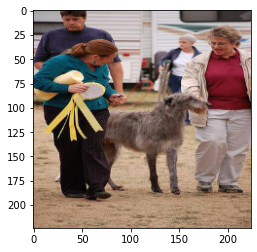

In [197]:
index = np.random.randint(len(new_data))
plt.imshow(X[index])
print(index)
print(new_data['id'][index])
print(y[index])

In [198]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [199]:
from torchvision import models

In [200]:
model = models.vgg16_bn(pretrained=True)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 13, stratify=y)

In [202]:
print("training data: (",X_train.shape, ",",y_train.shape,")")
print("test data: (",X_test.shape, ",",y_test.shape,")")

training data: ( (323, 224, 224, 3) , (323,) )
test data: ( (36, 224, 224, 3) , (36,) )


In [203]:
X_train

array([[[[0.46713063, 0.33548   , 0.23744226],
         [0.49864835, 0.37315816, 0.280161  ],
         [0.42523134, 0.30450317, 0.22215012],
         ...,
         [0.5429972 , 0.40182072, 0.27633053],
         [0.53739494, 0.39621848, 0.2707283 ],
         [0.53189504, 0.39072064, 0.26523226]],

        [[0.4146102 , 0.28295958, 0.18492185],
         [0.43553331, 0.31004313, 0.21704596],
         [0.37244016, 0.251712  , 0.16935894],
         ...,
         [0.47661063, 0.33543417, 0.20994397],
         [0.47100842, 0.32983196, 0.20434175],
         [0.4681504 , 0.32697603, 0.20148766]],

        [[0.3784463 , 0.24679568, 0.14875793],
         [0.40852275, 0.28303254, 0.1900354 ],
         [0.37729165, 0.25641337, 0.17411035],
         ...,
         [0.46260503, 0.32142857, 0.19593836],
         [0.4570028 , 0.31582633, 0.19033614],
         [0.45139402, 0.31021962, 0.18473126]],

        ...,

        [[0.09132515, 0.04902893, 0.04008549],
         [0.08879542, 0.05462186, 0.04425772]

In [204]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [205]:
# converting training images into torch format
X_train = X_train.reshape(len(X_train), 3, 224, 224)
X_train  = torch.from_numpy(X_train)

# converting the target into torch format
y_train = y_train.astype(int)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

# shape of training data
X_train.shape, y_train.shape

(torch.Size([323, 3, 224, 224]), torch.Size([323]))

In [168]:
# converting test images into torch format
X_test = X_test.reshape(len(X_test), 3, 224, 224)
X_test  = torch.from_numpy(X_test)

# converting the target into torch format
y_test = y_test.astype(int)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

# shape of test data
X_test.shape, y_test.shape

(torch.Size([36, 3, 224, 224]), torch.Size([36]))

In [169]:
model.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mo

In [170]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [171]:
for param in model.parameters():
    param.requires_grad = False

In [172]:
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD


In [173]:
model.classifier[6] = Sequential(
                      Linear(4096, 3))

In [174]:
for param in model.classifier[6].parameters():
    param.requires_grad = True

In [175]:
# batch_size
batch_size = 32

# extracting features for train data
data_x = []
label_x = []

inputs,labels = X_train, y_train

for i in tqdm(range(int(X_train.shape[0]/batch_size)+1)):
    input_data = inputs[i*batch_size:(i+1)*batch_size]
    label_data = labels[i*batch_size:(i+1)*batch_size]
    input_data , label_data = Variable(input_data),Variable(label_data)
    # We just use our model's feature phase
    print(input_data)
    print
    x = model.features(input_data)
    data_x.extend(x.data.cpu().numpy())
    label_x.extend(label_data.data.cpu().numpy())

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

tensor([[[[4.6713e-01, 3.3548e-01, 2.3744e-01,  ..., 3.0420e-01,
           5.1441e-01, 3.4214e-01],
          [2.0488e-01, 5.1411e-01, 3.3380e-01,  ..., 2.2164e-01,
           1.6497e-01, 3.2023e-01],
          [2.2527e-01, 1.8633e-01, 3.4307e-01,  ..., 5.3190e-01,
           3.9072e-01, 2.6523e-01],
          ...,
          [6.7472e-01, 5.4531e-01, 8.5245e-01,  ..., 4.5490e-01,
           3.0980e-01, 1.9608e-01],
          [4.6865e-01, 3.0434e-01, 1.8712e-01,  ..., 2.4321e-01,
           4.8999e-01, 3.0245e-01],
          [1.7532e-01, 5.1294e-01, 3.2394e-01,  ..., 6.5695e-01,
           5.3087e-01, 8.7230e-01]],

         [[6.7982e-01, 5.5419e-01, 8.5077e-01,  ..., 4.5859e-01,
           3.1853e-01, 2.0229e-01],
          [4.9627e-01, 2.8674e-01, 2.0234e-01,  ..., 2.2535e-01,
           5.2034e-01, 3.2482e-01],
          [1.8252e-01, 5.3044e-01, 3.3156e-01,  ..., 6.4889e-01,
           5.3039e-01, 8.6597e-01],
          ...,
          [8.0833e-02, 3.8292e-01, 2.0365e-01,  ..., 2.3572

  9%|███████▌                                                                           | 1/11 [00:04<00:46,  4.66s/it]

tensor([[[[0.5076, 0.5388, 0.6395,  ..., 0.7392, 0.6418, 0.6716],
          [0.7425, 0.6442, 0.6741,  ..., 0.7011, 0.7645, 0.6673],
          [0.7009, 0.7643, 0.6736,  ..., 0.5568, 0.5915, 0.6853],
          ...,
          [0.5208, 0.5180, 0.5453,  ..., 0.8041, 0.8033, 0.8254],
          [0.1187, 0.1260, 0.1078,  ..., 0.6240, 0.5536, 0.6647],
          [0.6731, 0.4950, 0.6490,  ..., 0.7823, 0.8178, 0.6747]],

         [[0.5496, 0.5707, 0.6590,  ..., 0.8164, 0.8091, 0.8332],
          [0.1222, 0.1295, 0.1113,  ..., 0.6548, 0.4607, 0.5991],
          [0.5921, 0.4551, 0.6262,  ..., 0.7802, 0.8280, 0.6970],
          ...,
          [0.3334, 0.4581, 0.3998,  ..., 0.5278, 0.4055, 0.5971],
          [0.5066, 0.3812, 0.5681,  ..., 0.4689, 0.5231, 0.3900],
          [0.5109, 0.5673, 0.4250,  ..., 0.4073, 0.5083, 0.4503]],

         [[0.3352, 0.4244, 0.3678,  ..., 0.5409, 0.4198, 0.5224],
          [0.4259, 0.3035, 0.5690,  ..., 0.4667, 0.5105, 0.3793],
          [0.4174, 0.4881, 0.3405,  ..., 0

 18%|███████████████                                                                    | 2/11 [00:09<00:41,  4.61s/it]

tensor([[[[9.0176e-01, 9.0176e-01, 9.0176e-01,  ..., 9.0148e-01,
           9.0728e-01, 9.0730e-01],
          [9.0729e-01, 9.1450e-01, 9.1450e-01,  ..., 8.7211e-01,
           8.6846e-01, 8.6496e-01],
          [8.7226e-01, 8.6861e-01, 8.7085e-01,  ..., 8.0544e-01,
           8.0946e-01, 8.1536e-01],
          ...,
          [4.4937e-01, 3.4715e-01, 3.1403e-01,  ..., 3.5467e-01,
           1.5934e-01, 1.5966e-01],
          [9.2099e-01, 9.2099e-01, 9.1327e-01,  ..., 2.4416e-01,
           2.3719e-01, 2.4123e-01],
          [3.1966e-01, 2.1184e-01, 2.1576e-01,  ..., 3.9703e-01,
           2.9672e-01, 2.8929e-01]],

         [[3.5201e-01, 2.4964e-01, 3.4032e-01,  ..., 3.2927e-01,
           1.3111e-01, 1.2656e-01],
          [9.2687e-01, 9.2687e-01, 9.1914e-01,  ..., 3.2238e-01,
           1.9819e-01, 2.0223e-01],
          [2.8066e-01, 2.6325e-01, 2.6717e-01,  ..., 3.7743e-01,
           2.9333e-01, 3.8953e-01],
          ...,
          [9.1214e-02, 9.4933e-02, 8.8625e-02,  ..., 5.8641

 27%|██████████████████████▋                                                            | 3/11 [00:13<00:37,  4.67s/it]

tensor([[[[0.8907, 0.9068, 0.8944,  ..., 0.9237, 0.9203, 0.9177],
          [0.9244, 0.9282, 0.9252,  ..., 0.9265, 0.9265, 0.9265],
          [0.9265, 0.9265, 0.9265,  ..., 0.8976, 0.8976, 0.8976],
          ...,
          [0.8440, 0.8327, 0.8493,  ..., 0.4863, 0.5227, 0.4627],
          [0.3822, 0.3695, 0.3693,  ..., 0.4788, 0.5802, 0.5215],
          [0.5340, 0.6318, 0.5769,  ..., 0.7875, 0.7815, 0.8241]],

         [[0.8641, 0.8493, 0.8144,  ..., 0.4893, 0.5273, 0.4243],
          [0.1033, 0.0904, 0.0919,  ..., 0.4094, 0.4601, 0.4013],
          [0.4224, 0.6314, 0.5758,  ..., 0.8286, 0.8403, 0.7005],
          ...,
          [0.1948, 0.1347, 0.1300,  ..., 0.4672, 0.4986, 0.6475],
          [0.6200, 0.6514, 0.4825,  ..., 0.2695, 0.3638, 0.1352],
          [0.2267, 0.3089, 0.1573,  ..., 0.3747, 0.2661, 0.2583]],

         [[0.2779, 0.1114, 0.1067,  ..., 0.3296, 0.3610, 0.5878],
          [0.5603, 0.5917, 0.5118,  ..., 0.3318, 0.3665, 0.2658],
          [0.3711, 0.4462, 0.2984,  ..., 0

 36%|██████████████████████████████▏                                                    | 4/11 [00:18<00:33,  4.77s/it]

tensor([[[[0.0352, 0.1088, 0.2319,  ..., 0.4448, 0.5043, 0.5082],
          [0.4537, 0.5006, 0.5045,  ..., 0.1203, 0.1896, 0.3607],
          [0.1545, 0.2245, 0.3436,  ..., 0.2893, 0.2453, 0.3310],
          ...,
          [0.7858, 0.7623, 0.7639,  ..., 0.3521, 0.4572, 0.5589],
          [0.5596, 0.5904, 0.5969,  ..., 0.5133, 0.5778, 0.5867],
          [0.5289, 0.5769, 0.5880,  ..., 0.8062, 0.7827, 0.7732]],

         [[0.7928, 0.7692, 0.7696,  ..., 0.3902, 0.4782, 0.5561],
          [0.5586, 0.5951, 0.5987,  ..., 0.5178, 0.5787, 0.5833],
          [0.5230, 0.5875, 0.5923,  ..., 0.8153, 0.7918, 0.7797],
          ...,
          [0.6708, 0.7040, 0.7166,  ..., 0.8781, 0.8545, 0.8634],
          [0.8831, 0.8595, 0.8663,  ..., 0.5642, 0.6183, 0.6087],
          [0.6214, 0.6061, 0.6040,  ..., 0.6453, 0.6842, 0.6959]],

         [[0.6595, 0.6992, 0.7118,  ..., 0.8721, 0.8486, 0.8604],
          [0.8800, 0.8565, 0.8588,  ..., 0.5678, 0.6189, 0.6189],
          [0.6442, 0.6505, 0.6412,  ..., 0

 45%|█████████████████████████████████████▋                                             | 5/11 [00:23<00:29,  4.84s/it]

tensor([[[[0.7659, 0.6820, 0.6310,  ..., 0.2781, 0.2861, 0.3057],
          [0.2824, 0.3417, 0.3613,  ..., 0.8945, 0.9141, 0.8867],
          [0.8906, 0.9102, 0.8846,  ..., 0.7659, 0.7695, 0.7878],
          ...,
          [0.0640, 0.0750, 0.1170,  ..., 0.7553, 0.7553, 0.7626],
          [0.3779, 0.5463, 0.2710,  ..., 0.4860, 0.6136, 0.6135],
          [0.4468, 0.6267, 0.6304,  ..., 0.0498, 0.0614, 0.0264]],

         [[0.0285, 0.0445, 0.0757,  ..., 0.7495, 0.7495, 0.7568],
          [0.3581, 0.5292, 0.2380,  ..., 0.5116, 0.6552, 0.6474],
          [0.4812, 0.6512, 0.6398,  ..., 0.0759, 0.0774, 0.0357],
          ...,
          [0.2808, 0.3062, 0.3589,  ..., 0.4631, 0.4507, 0.4390],
          [0.4194, 0.4037, 0.4295,  ..., 0.3994, 0.4549, 0.2917],
          [0.4260, 0.5747, 0.3366,  ..., 0.2227, 0.3659, 0.4589]],

         [[0.2765, 0.3422, 0.4195,  ..., 0.3850, 0.3726, 0.4502],
          [0.4306, 0.4150, 0.4106,  ..., 0.4405, 0.4852, 0.3192],
          [0.4678, 0.6013, 0.3727,  ..., 0

 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:28<00:24,  4.85s/it]

tensor([[[[4.8429e-02, 4.8429e-02, 4.1191e-02,  ..., 2.8794e-01,
           2.7825e-01, 2.3935e-01],
          [2.3546e-01, 1.9759e-01, 1.5868e-01,  ..., 4.6898e-01,
           4.4953e-01, 5.2125e-01],
          [4.8624e-01, 4.6679e-01, 5.2111e-01,  ..., 3.6092e-01,
           3.6454e-01, 3.4645e-01],
          ...,
          [6.5501e-01, 6.9183e-01, 6.1854e-01,  ..., 3.6543e-01,
           3.2459e-01, 2.9375e-01],
          [5.4609e-01, 5.2055e-01, 4.5125e-01,  ..., 2.0563e-01,
           3.8802e-01, 3.1743e-01],
          [2.2332e-01, 3.6086e-01, 2.9027e-01,  ..., 5.0101e-01,
           5.3267e-01, 6.1521e-01]],

         [[6.3126e-01, 6.4467e-01, 6.1374e-01,  ..., 1.7614e-01,
           1.1260e-01, 8.7029e-02],
          [5.7089e-01, 5.4535e-01, 4.7605e-01,  ..., 1.8941e-01,
           3.7395e-01, 3.0336e-01],
          [2.0924e-01, 3.7483e-01, 3.0424e-01,  ..., 5.0857e-01,
           5.2130e-01, 4.2645e-01],
          ...,
          [3.4695e-01, 5.5329e-01, 5.1182e-01,  ..., 5.0748

 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:34<00:20,  5.00s/it]

tensor([[[[6.2417e-02, 9.2668e-02, 3.7951e-02,  ..., 5.4166e-02,
           1.0122e-01, 1.9069e-01],
          [2.7332e-02, 8.1456e-02, 1.6772e-01,  ..., 1.5558e-01,
           2.3314e-02, 6.4688e-02],
          [1.5805e-01, 2.5780e-02, 1.1269e-01,  ..., 4.3875e-02,
           8.3681e-02, 2.5782e-02],
          ...,
          [8.9730e-01, 8.9731e-01, 8.9986e-01,  ..., 3.5884e-01,
           4.2448e-01, 2.8188e-01],
          [7.6212e-02, 1.7485e-01, 2.5329e-02,  ..., 1.1882e-01,
           3.3261e-01, 4.2521e-01],
          [2.1111e-01, 4.6517e-01, 5.2086e-01,  ..., 8.7881e-01,
           8.7881e-01, 8.9048e-01]],

         [[8.9048e-01, 8.9048e-01, 8.9590e-01,  ..., 3.5840e-01,
           4.2489e-01, 2.6925e-01],
          [7.2516e-02, 1.6830e-01, 3.1032e-02,  ..., 1.6756e-01,
           2.6260e-01, 3.4685e-01],
          [1.4168e-01, 4.9146e-01, 5.4074e-01,  ..., 8.7814e-01,
           8.7814e-01, 8.8224e-01],
          ...,
          [9.0231e-02, 2.3244e-01, 3.1745e-01,  ..., 5.4693

 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:39<00:14,  4.99s/it]

tensor([[[[0.3484, 0.2364, 0.2597,  ..., 0.1652, 0.1750, 0.1219],
          [0.1603, 0.1696, 0.1378,  ..., 0.1815, 0.1829, 0.2443],
          [0.1866, 0.1866, 0.2560,  ..., 0.3518, 0.2744, 0.3287],
          ...,
          [0.2314, 0.2371, 0.6285,  ..., 0.8774, 0.8759, 0.9855],
          [0.5162, 0.4630, 0.5570,  ..., 0.5328, 0.5486, 0.5346],
          [0.6494, 0.3845, 0.3754,  ..., 0.2933, 0.3209, 0.4564]],

         [[0.3809, 0.3912, 0.7270,  ..., 0.8544, 0.8691, 0.9994],
          [0.3408, 0.2524, 0.3215,  ..., 0.5948, 0.5337, 0.5234],
          [0.6440, 0.4407, 0.4351,  ..., 0.2080, 0.2284, 0.5608],
          ...,
          [0.7586, 0.5655, 0.5796,  ..., 0.7190, 0.7826, 0.7033],
          [0.6955, 0.7504, 0.5721,  ..., 0.5476, 0.4888, 0.5646],
          [0.4196, 0.3883, 0.4824,  ..., 0.7524, 0.6094, 0.6151]],

         [[0.7196, 0.6230, 0.6308,  ..., 0.6860, 0.7496, 0.6942],
          [0.6863, 0.7412, 0.6173,  ..., 0.5518, 0.4930, 0.5753],
          [0.4026, 0.3802, 0.4689,  ..., 0

 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [00:44<00:10,  5.02s/it]

tensor([[[[0.0402, 0.1022, 0.0329,  ..., 0.0707, 0.0741, 0.0937],
          [0.0692, 0.0649, 0.0845,  ..., 0.0298, 0.0220, 0.0305],
          [0.0305, 0.0227, 0.0225,  ..., 0.0401, 0.0401, 0.0329],
          ...,
          [0.2746, 0.1394, 0.2655,  ..., 0.1166, 0.1238, 0.0837],
          [0.2574, 0.3631, 0.1297,  ..., 0.1835, 0.3345, 0.3933],
          [0.1666, 0.3248, 0.3863,  ..., 0.2469, 0.1234, 0.2261]],

         [[0.2457, 0.1222, 0.2412,  ..., 0.1024, 0.1024, 0.0732],
          [0.2556, 0.3749, 0.1064,  ..., 0.1991, 0.2966, 0.3353],
          [0.1645, 0.3222, 0.3615,  ..., 0.2872, 0.1608, 0.2424],
          ...,
          [0.2896, 0.5253, 0.4597,  ..., 0.5791, 0.2783, 0.3984],
          [0.5269, 0.2145, 0.4239,  ..., 0.3049, 0.3598, 0.1617],
          [0.4560, 0.4334, 0.2881,  ..., 0.3441, 0.5467, 0.4839]],

         [[0.3549, 0.5585, 0.4930,  ..., 0.5175, 0.2144, 0.4035],
          [0.5346, 0.2073, 0.4636,  ..., 0.3623, 0.4335, 0.2192],
          [0.4395, 0.4143, 0.2619,  ..., 0

 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:49<00:05,  5.07s/it]

tensor([[[[0.9252, 0.9033, 0.8595,  ..., 0.7852, 0.8694, 0.8184],
          [0.7855, 0.8671, 0.8160,  ..., 0.6758, 0.6284, 0.7268],
          [0.6757, 0.6283, 0.7259,  ..., 0.5005, 0.5041, 0.4530],
          ...,
          [0.6174, 0.5037, 0.7370,  ..., 0.6886, 0.5827, 0.4690],
          [0.5194, 0.3979, 0.2763,  ..., 0.1219, 0.1562, 0.1521],
          [0.1358, 0.1621, 0.1356,  ..., 0.6082, 0.4945, 0.7496]],

         [[0.6281, 0.5144, 0.7419,  ..., 0.6918, 0.5859, 0.4722],
          [0.5248, 0.4032, 0.2828,  ..., 0.1329, 0.1455, 0.1353],
          [0.1148, 0.1310, 0.1035,  ..., 0.6077, 0.4940, 0.7266],
          ...,
          [0.0916, 0.1451, 0.1057,  ..., 0.1699, 0.1131, 0.1916],
          [0.1557, 0.0989, 0.1997,  ..., 0.1495, 0.1150, 0.0781],
          [0.1986, 0.1594, 0.1202,  ..., 0.0318, 0.1549, 0.1116]],

         [[0.0974, 0.1964, 0.1562,  ..., 0.1556, 0.1086, 0.1887],
          [0.1495, 0.1024, 0.1861,  ..., 0.1528, 0.1175, 0.0822],
          [0.1746, 0.1354, 0.0961,  ..., 0

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:49<00:00,  4.53s/it]


In [176]:
# extracting features for test data
data_y = []
label_y = []

inputs,labels = X_test, y_test

for i in tqdm(range(int(X_test.shape[0]/batch_size)+1)):
    input_data = inputs[i*batch_size:(i+1)*batch_size]
    label_data = labels[i*batch_size:(i+1)*batch_size]
    input_data , label_data = Variable(input_data),Variable(label_data)
    x = model.features(input_data)
    data_y.extend(x.data.cpu().numpy())
    label_y.extend(label_data.data.cpu().numpy())

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.69s/it]


In [177]:
# converting the features into torch format
X_train  = torch.from_numpy(np.array(data_x))
X_train = X_train.view(X_train.size(0), -1)
y_train  = torch.from_numpy(np.array(label_x))
X_test  = torch.from_numpy(np.array(data_y))
X_test = X_test.view(X_test.size(0), -1)
y_test  = torch.from_numpy(np.array(label_y))

In [178]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.001)

In [179]:
# batch size
batch_size = 32

# number of epochs to train the model
n_epochs = 26

for epoch in tqdm(range(1, n_epochs+1)):

    # keep track of training loss
    train_loss = 0.0
        
    permutation = torch.randperm(X_train.size()[0])

    training_loss = []
    for i in range(0,X_train.size()[0], batch_size):

        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]
        
        if torch.cuda.is_available():
            batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        
        optimizer.zero_grad()
        # in case you wanted a semi-full example
        outputs = model.classifier(batch_x)
        loss = criterion(outputs,batch_y)

        training_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        
    training_loss = np.average(training_loss)
    print('epoch: \t', epoch, '\t training loss: \t', training_loss)

  4%|███▏                                                                               | 1/26 [00:00<00:19,  1.31it/s]

epoch: 	 1 	 training loss: 	 0.9882821278138594


  8%|██████▍                                                                            | 2/26 [00:01<00:18,  1.31it/s]

epoch: 	 2 	 training loss: 	 0.8266846266659823


 12%|█████████▌                                                                         | 3/26 [00:02<00:17,  1.32it/s]

epoch: 	 3 	 training loss: 	 0.6528066911480643


 15%|████████████▊                                                                      | 4/26 [00:03<00:16,  1.32it/s]

epoch: 	 4 	 training loss: 	 0.6150892024690454


 19%|███████████████▉                                                                   | 5/26 [00:03<00:15,  1.31it/s]

epoch: 	 5 	 training loss: 	 0.6297601515596564


 23%|███████████████████▏                                                               | 6/26 [00:04<00:15,  1.31it/s]

epoch: 	 6 	 training loss: 	 0.5571659153158014


 27%|██████████████████████▎                                                            | 7/26 [00:05<00:14,  1.27it/s]

epoch: 	 7 	 training loss: 	 0.5139834515073083


 31%|█████████████████████████▌                                                         | 8/26 [00:06<00:14,  1.27it/s]

epoch: 	 8 	 training loss: 	 0.5489311868494208


 35%|████████████████████████████▋                                                      | 9/26 [00:06<00:13,  1.29it/s]

epoch: 	 9 	 training loss: 	 0.5550028925592249


 38%|███████████████████████████████▌                                                  | 10/26 [00:07<00:12,  1.32it/s]

epoch: 	 10 	 training loss: 	 0.5062207606705752


 42%|██████████████████████████████████▋                                               | 11/26 [00:08<00:11,  1.34it/s]

epoch: 	 11 	 training loss: 	 0.41512165421789343


 46%|█████████████████████████████████████▊                                            | 12/26 [00:09<00:10,  1.33it/s]

epoch: 	 12 	 training loss: 	 0.4633552702990445


 50%|█████████████████████████████████████████                                         | 13/26 [00:09<00:09,  1.32it/s]

epoch: 	 13 	 training loss: 	 0.4305676140568473


 54%|████████████████████████████████████████████▏                                     | 14/26 [00:10<00:08,  1.35it/s]

epoch: 	 14 	 training loss: 	 0.4001061428676952


 58%|███████████████████████████████████████████████▎                                  | 15/26 [00:11<00:08,  1.36it/s]

epoch: 	 15 	 training loss: 	 0.38413702086968854


 62%|██████████████████████████████████████████████████▍                               | 16/26 [00:12<00:07,  1.34it/s]

epoch: 	 16 	 training loss: 	 0.40345983884551306


 65%|█████████████████████████████████████████████████████▌                            | 17/26 [00:12<00:06,  1.35it/s]

epoch: 	 17 	 training loss: 	 0.36630034378983756


 69%|████████████████████████████████████████████████████████▊                         | 18/26 [00:13<00:05,  1.35it/s]

epoch: 	 18 	 training loss: 	 0.3882046409628608


 73%|███████████████████████████████████████████████████████████▉                      | 19/26 [00:14<00:05,  1.36it/s]

epoch: 	 19 	 training loss: 	 0.38085444407029584


 77%|███████████████████████████████████████████████████████████████                   | 20/26 [00:15<00:04,  1.36it/s]

epoch: 	 20 	 training loss: 	 0.40404038808562537


 81%|██████████████████████████████████████████████████████████████████▏               | 21/26 [00:15<00:03,  1.33it/s]

epoch: 	 21 	 training loss: 	 0.35333588312972675


 85%|█████████████████████████████████████████████████████████████████████▍            | 22/26 [00:16<00:02,  1.34it/s]

epoch: 	 22 	 training loss: 	 0.31891486048698425


 88%|████████████████████████████████████████████████████████████████████████▌         | 23/26 [00:17<00:02,  1.36it/s]

epoch: 	 23 	 training loss: 	 0.35875752568244934


 92%|███████████████████████████████████████████████████████████████████████████▋      | 24/26 [00:17<00:01,  1.36it/s]

epoch: 	 24 	 training loss: 	 0.308397729288448


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 25/26 [00:18<00:00,  1.33it/s]

epoch: 	 25 	 training loss: 	 0.3762560093944723


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:19<00:00,  1.33it/s]

epoch: 	 26 	 training loss: 	 0.36178710853511636


In [180]:
# prediction for train set
with torch.no_grad():
    output = model.classifier(X_train)

probs = np.array(torch.exp(output).cpu())
predictions = np.argmax(probs, axis=1)

np.mean(predictions==np.array(y_train))

0.8978328173374613

In [181]:
with torch.no_grad():
    output = model.classifier(X_test)

probs = np.array(torch.exp(output).cpu())
predictions = np.argmax(probs, axis=1)

np.mean(predictions==np.array(y_test))

0.5555555555555556

In [54]:
probs

array([[3.2621138e-02, 7.1651858e-01, 8.6324671e-03, ..., 5.7329377e-03,
        2.9319334e-03, 4.3076454e-03],
       [1.2698746e-03, 5.3340243e-03, 5.2093640e-02, ..., 2.6548816e-02,
        4.5192037e-02, 1.1375368e-02],
       [8.9179382e-02, 6.6429586e-03, 1.3220276e-02, ..., 4.3240523e-01,
        6.6972887e-03, 6.4156158e-03],
       ...,
       [4.5436076e-03, 9.2661532e-04, 2.5260881e-02, ..., 5.5772296e-05,
        1.9621254e-04, 6.8879090e-02],
       [2.2222463e-03, 4.2675573e-02, 7.1327887e-02, ..., 1.1747233e-03,
        3.6814091e-01, 4.7377132e-02],
       [5.4523707e-03, 1.9828884e-02, 6.8887085e-02, ..., 1.0336074e-01,
        5.8472242e-02, 1.6603161e-02]], dtype=float32)

In [32]:
model.classifier


NameError: name 'model' is not defined

In [54]:
predictions

array([1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0], dtype=int64)

In [55]:
y_test

tensor([1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
        0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2])

NameError: name 'subset' is not defined

In [58]:
# def loadDataFromFolder(folder):
#     train_img = []
#     for filename in os.listdir(folder):
#         img = mpimg.imread(os.path.join(folder,filename))
#         if img is not None:
#             train_img.append(img)
#     return train_img

In [59]:
# train_img_temp = loadDataFromFolder('train')

In [60]:
# train_img_temp

In [61]:
# train_img = [v for i, v in enumerate(train_img_temp) if i not in toRemove.index]

In [62]:
# len(train_img)

In [63]:
# new_data.reset_index(drop=True)

In [64]:
# images = loadDataFromFolder('train')

In [65]:
# ind = randint(0,len(images))
# plt.imshow(images[ind])